In [2]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

# Import the necessary packages and modules
import datetime, os
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('./sci.mplstyle')
from tensorflow.keras import datasets, layers, models, losses

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [3]:
# Read Fashion mnist dataset
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()

print('Train shape:', x_train.shape)
print('Train samples:', x_train.shape[0])
print('Test samples:', x_test.shape[0], )
print('Image shape:', x_train[0].shape)

Train shape: (60000, 28, 28)
Train samples: 60000
Test samples: 10000
Image shape: (28, 28)


In [4]:
# Normalization dataset
x_train = x_train/255
x_test = x_test/255

# Reshaping dataset
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)
x_train.shape

(60000, 784)

In [5]:
# Validation data extraction 
x_val = x_train[-2000:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:]
y_train = y_train[:-2000]
x_train.shape

(58000, 784)

In [6]:
# Build the ANN model
model = models.Sequential()
# Add hidden layer
model.add(tf.keras.layers.Dense(units = 128, activation = 'sigmoid', input_shape = (784,)))
# Add droput for hidden layer
model.add(tf.keras.layers.Dropout(0.2))
# Adding output layer
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))
# Summary the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


2022-09-12 15:37:04.733744: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-12 15:37:04.734081: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/intel/oneapi/intelpython/latest/lib:/opt/intel/oneapi/mkl/latest/lib/intel64:
2022-09-12 15:37:04.734117: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/intel/oneapi/intelpython/latest/lib:/opt/intel/oneapi/mkl/latest/lib/intel64:
2022-09-12 15:37:04.734152: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library

In [7]:
# Configures the ANN model for training
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
# Store log for TensorBoard
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)
# Training the ANN model with the given inputs
history = model.fit(x=x_train, y=y_train, batch_size=64, epochs=30, validation_data=(x_train, y_train), callbacks=[tensorboard_callback])

Epoch 1/30
907/907 [==============================] - 2s 2ms/step - loss: 0.5377 - accuracy: 0.8549 - val_loss: 0.2830 - val_accuracy: 0.9213
Epoch 2/30
907/907 [==============================] - 1s 1ms/step - loss: 0.2761 - accuracy: 0.9189 - val_loss: 0.2097 - val_accuracy: 0.9402
Epoch 3/30
907/907 [==============================] - 1s 1ms/step - loss: 0.2194 - accuracy: 0.9354 - val_loss: 0.1666 - val_accuracy: 0.9522
Epoch 4/30
907/907 [==============================] - 1s 1ms/step - loss: 0.1806 - accuracy: 0.9476 - val_loss: 0.1376 - val_accuracy: 0.9603
Epoch 5/30
907/907 [==============================] - 1s 1ms/step - loss: 0.1549 - accuracy: 0.9553 - val_loss: 0.1155 - val_accuracy: 0.9663
Epoch 6/30
907/907 [==============================] - 1s 1ms/step - loss: 0.1347 - accuracy: 0.9607 - val_loss: 0.0985 - val_accuracy: 0.9713
Epoch 7/30
907/907 [==============================] - 1s 1ms/step - loss: 0.1193 - accuracy: 0.9649 - val_loss: 0.0854 - val_accuracy: 0.9752
Epoch 

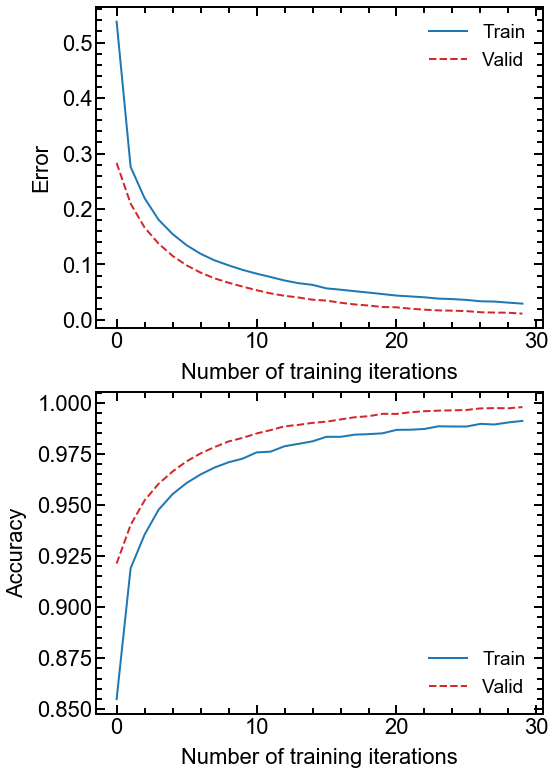

In [8]:
# Plot results with Matplotlib
fig, axs = plt.subplots(2, 1, figsize=(8,13))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'],ls='--')
axs[0].set_xlabel('Number of training iterations')
axs[0].set_ylabel('Error')
axs[0].legend(['Train', 'Valid'])

axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'],ls='--')
axs[1].set_xlabel('Number of training iterations')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Valid'])

# Show figure
plt.savefig('ANN-general.png', format="png", dpi=600)
plt.show()

In [9]:
# Evaluating the already trained ANN model using the test data
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 493us/step - loss: 0.0701 - accuracy: 0.9801


[0.07011930644512177, 0.9800999760627747]

In [10]:
# Show data with TensorBoard
%tensorboard --logdir logs